### ST1 Capstone Project / Dataset number 5

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/ST1

/content/drive/MyDrive/Colab Notebooks/ST1


In [7]:
!ls

clothes_price_prediction_data.csv  DataForML.pkl


This project will be based on the dataset from kaggle repository which includes about the clothing prices from different brands, clothing types and prices.

### STEP 1: Reading the Data description.

In [12]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
# Reading the dataset
import pandas as pd
import numpy as np
ClothingData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ST1/clothes_price_prediction_data.csv', encoding='latin')
print('Shape before deleting duplicate values:', ClothingData.shape)


Shape before deleting duplicate values: (1000, 6)


In [13]:
# Removing duplicate rows if any
ClothingData=ClothingData.drop_duplicates()
print('Shape After deleting duplicate values:', ClothingData.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
ClothingData.head(10)

Shape After deleting duplicate values: (1000, 6)


,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
5,Reebok,Jacket,Red,XL,Nylon,19
6,Puma,Jacket,Red,XXL,Polyester,31
7,Adidas,Dress,Red,XS,Denim,46
8,Reebok,Dress,Black,S,Wool,97
9,Adidas,Jeans,Yellow,L,Wool,80


### Key Observations from Step 1


*   There are 1000 products in the dataset including different clothes with different sizes, colors, pricepoints and materials

*   There are 6 attributes in the file. Those are as follows

  - Brand (Manufacturing brand of the clothes)
  - Category (Category of the clothes e.g Pants, dress, jacket etc)
  - Color (Color of the clothes e.g Blue , white, red , yellow etc)
  - Size (Size of the clothes e.g XS, XL , L , M etc)
  - Material (Manufacturing material of the clothes e.g Denim, Polyester , Wool etc)
  - Price (Selling price of the clothes)





### STEP 2: Problem Statement Definition

- Creating a price prediction model to predict the price of the clothes according to the category, color and other variebles

- Target Variebles : Price Predictors , Features: Brand,
Color, size, category, material,

### STEP 3: Choosing the appropirate ML/AI Algorithm for DATA Analysis

- Based on the problem statement definition, we need to create a ML regression model, as the target varieble is continuous

### STEP 4: Observing the class distribution.

<Axes: >

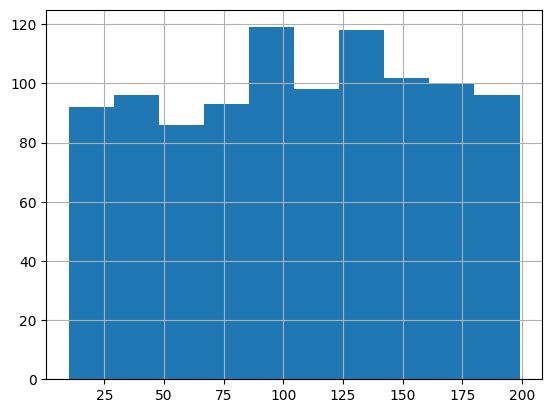

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the Price values
ClothingData['Price'].hist()

###Observation from STEP 4

- From the observation, we can conclude that the data of the target variable is not skewed.

- The data distribution is satisfactory and there are sufficient numbers of rows for each type of values to learn from .

###STEP 5: Basic Explanatory Data Analaysis (EDA)

In [ ]:
#Looking at sample rows in the data
ClothingData.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [ ]:
# Looking at sample rows in the data
ClothingData.tail()

,Brand,Category,Color,Size,Material,Price
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69
999,New Balance,Jacket,Yellow,XS,Wool,174


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ClothingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
# Looking at the descriptive statistics of the data
ClothingData.describe(include='all')

,Brand,Category,Color,Size,Material,Price
count,1000,1000,1000,1000,1000,1000.000000
unique,6,6,6,6,6,NaN
top,Under Armour,Jacket,Yellow,XS,Polyester,NaN
freq,179,191,173,196,175,NaN
mean,NaN,NaN,NaN,NaN,NaN,106.289000
std,NaN,NaN,NaN,NaN,NaN,53.695444
min,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,NaN,NaN,59.750000
50%,NaN,NaN,NaN,NaN,NaN,108.000000
75%,NaN,NaN,NaN,NaN,NaN,150.000000


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuou
ClothingData.nunique()

Brand         6
Category      6
Color         6
Size          6
Material      6
Price       190
dtype: int64

###Observation from STEP 5
To be finished

###STEP 6 : Removing unwanted columns

- Since there is no qualitative datas, there is no need to remove any columns

### STEP 7 : Basic Visual Expalanatory Data Analaysis

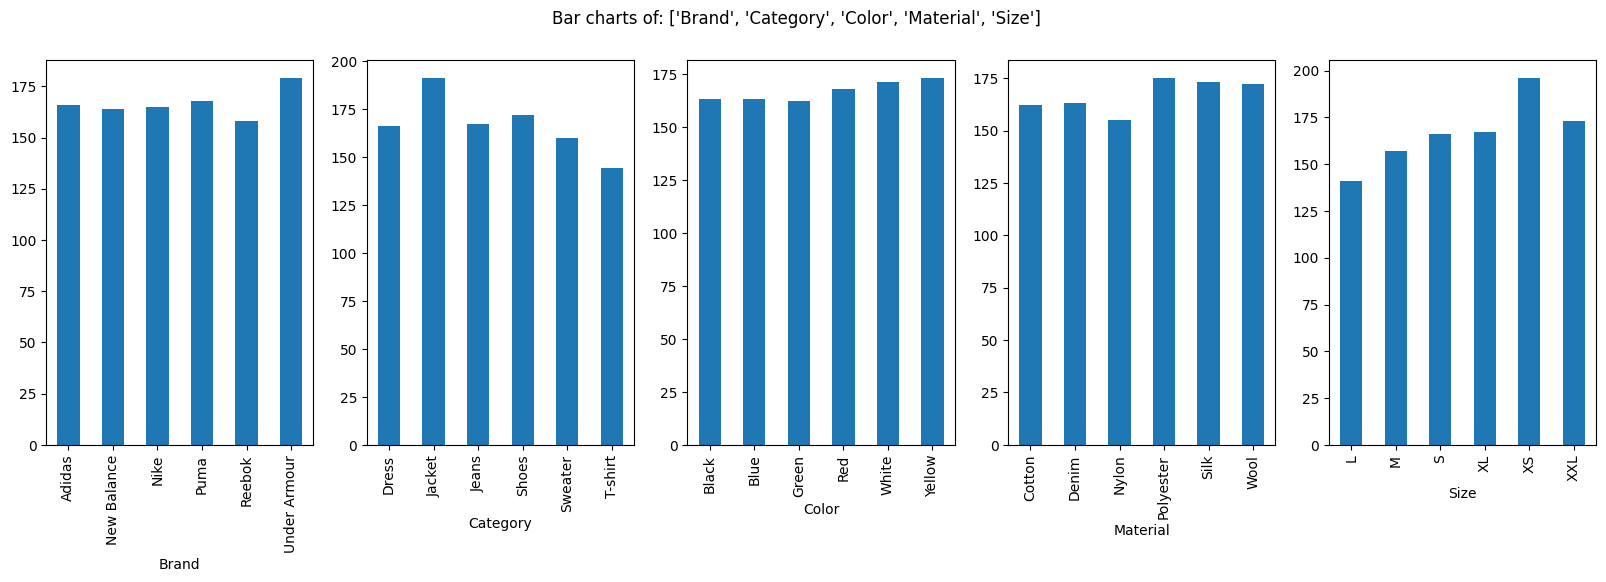

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=ClothingData, colsToPlot=['Brand','Category','Color','Material','Size'])


###Observations from Visual EDA

- To be finished

###Step 8: Visualizing the distributions of all continous predictor variables in the data using histograms

<Axes: >

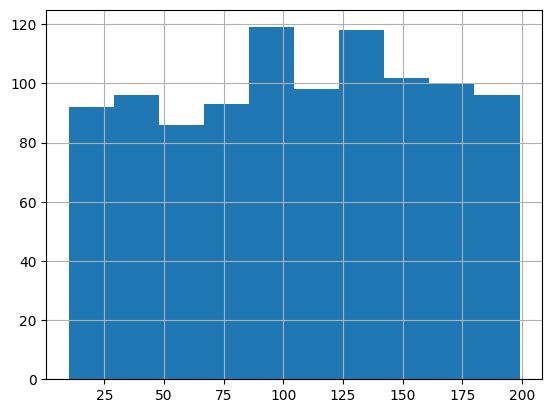

In [ ]:
ClothingData['Price'].hist()

###Observation from step 8
- To be finished

###Step 9: Outlier Analysis

Since the distribution for all the data seems uniform. There is no neeed for outlier analysis

###Step 10: Finding Missing Value

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ClothingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


###Observations from Step 10
- Since there is no missing values. We are not required to find any missing values.


###Step 11: Feature selection (Attribute Selection)
- To be finished

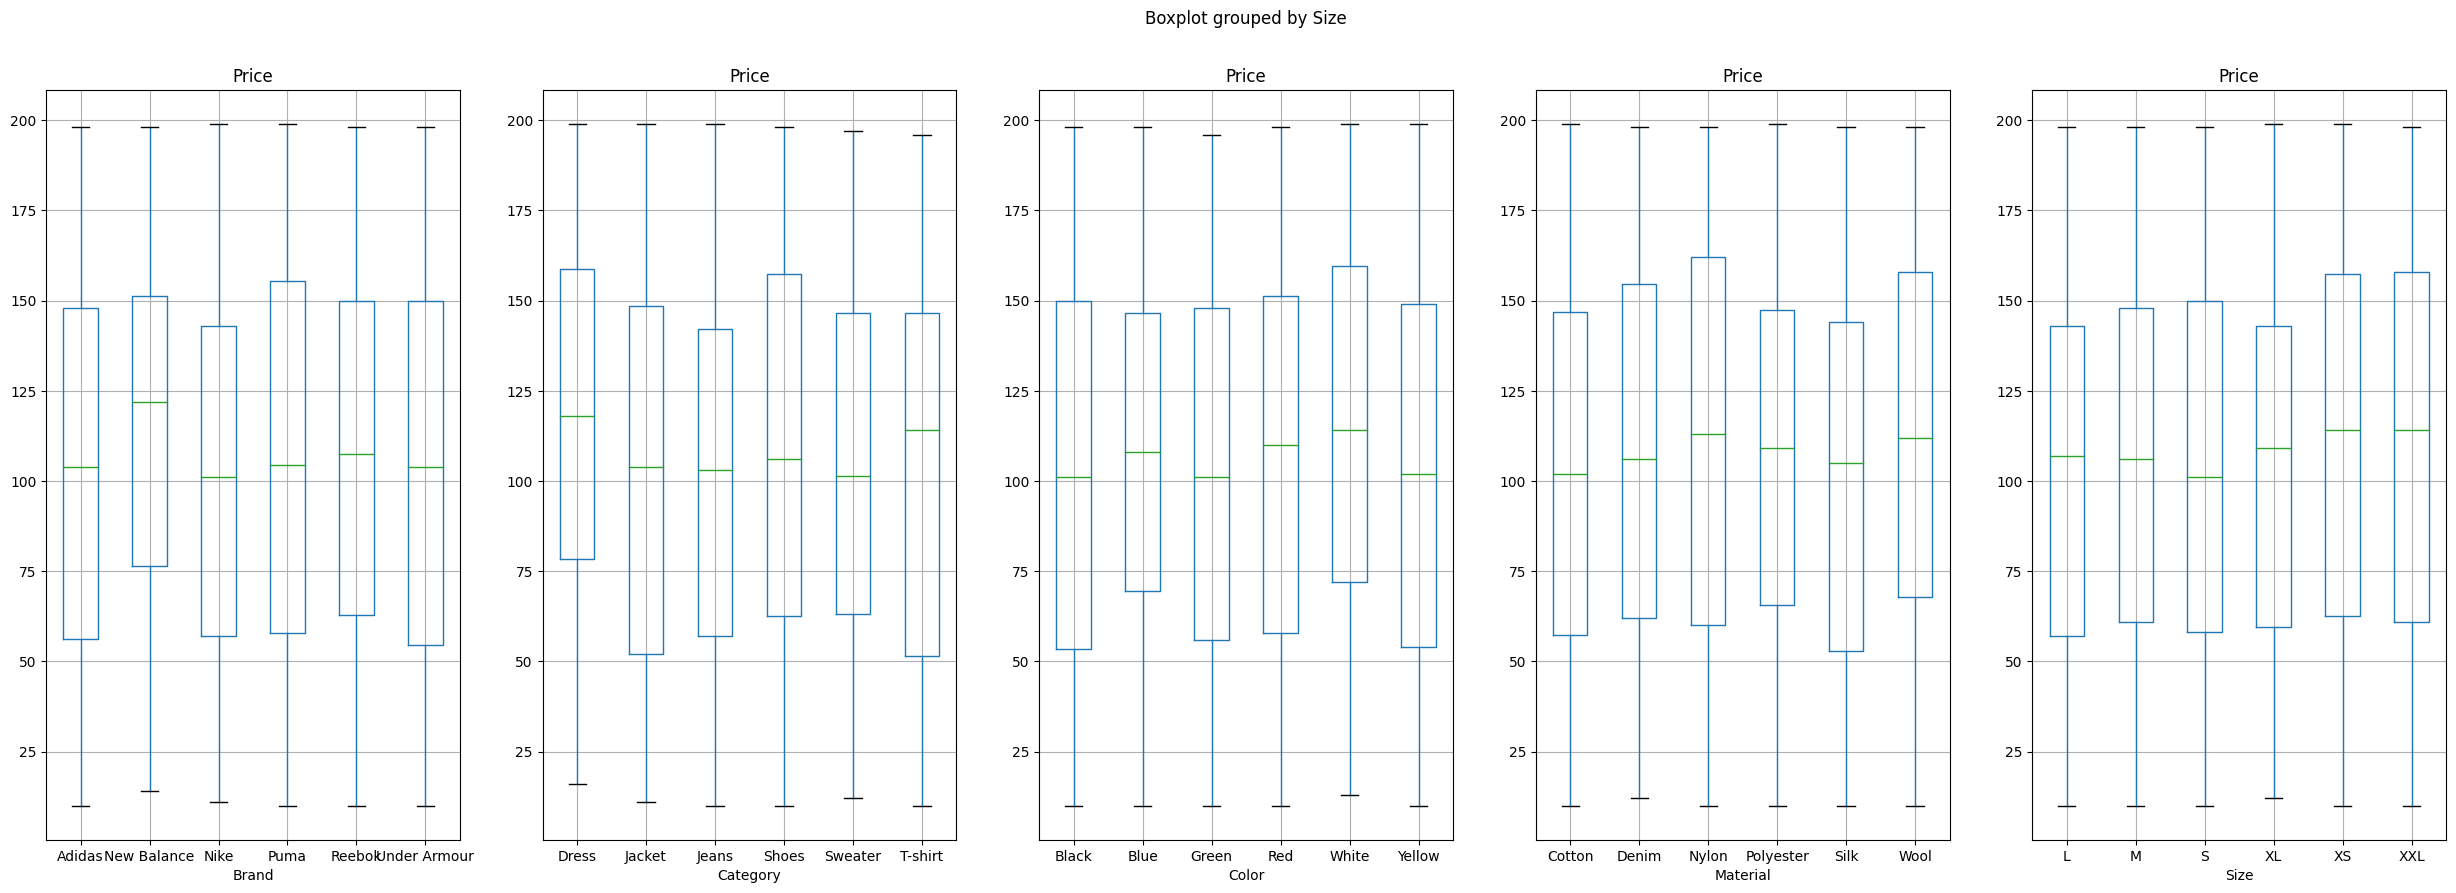

In [ ]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['Brand','Category','Color','Material','Size']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(30,10))
# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ClothingData.boxplot(column='Price', by=PredictorCol, figsize=(30,30), vert=True, ax=PlotCanvas[i])

###Observation from Step 10
- To be finished

###Statistical feature selection using Anova test
-To be finished

In [15]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Brand','Category','Color','Material','Size']
FunctionAnova(inpData=ClothingData,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Brand is NOT correlated with Price | P-Value: 0.2601099878167752
Category is NOT correlated with Price | P-Value: 0.22576473150531826
Color is NOT correlated with Price | P-Value: 0.4617893742587683
Material is NOT correlated with Price | P-Value: 0.7365826899195708
Size is NOT correlated with Price | P-Value: 0.7098835429591747


[]

###Observation from Anova test

#**NEEDS IMMIDIATE FIXING**

###Selecting Final predictor features for ML/AI training module
To be finished

In [16]:
SelectedColumns=['Brand','Category','Color','Material','Size']
# Selecting final columns
DataForML=ClothingData[SelectedColumns]
DataForML.head()

,Brand,Category,Color,Material,Size
0,New Balance,Dress,White,Nylon,XS
1,New Balance,Jeans,Black,Silk,XS
2,Under Armour,Dress,Red,Wool,M
3,Nike,Shoes,Green,Cotton,M
4,Adidas,Sweater,White,Nylon,M


In [17]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

###Step 13: Pre-processing the datas for ML model building and model development

In [18]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['Price']=ClothingData['Price']
# Printing sample rows
DataForML_Numeric.head()

,Brand_Adidas,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Under Armour,Category_Dress,Category_Jacket,Category_Jeans,Category_Shoes,...,Material_Polyester,Material_Silk,Material_Wool,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL,Price
0,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,182
1,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,57
2,False,False,False,False,False,True,True,False,False,False,...,False,False,True,False,True,False,False,False,False,127
3,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,77
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,113


###Step 14: Machine Learning Model Development

In [20]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Brand_Adidas', 'Brand_New Balance', 'Brand_Nike', 'Brand_Puma',
       'Brand_Reebok', 'Brand_Under Armour', 'Category_Dress',
       'Category_Jacket', 'Category_Jeans', 'Category_Shoes',
       'Category_Sweater', 'Category_T-shirt', 'Color_Black', 'Color_Blue',
       'Color_Green', 'Color_Red', 'Color_White', 'Color_Yellow',
       'Material_Cotton', 'Material_Denim', 'Material_Nylon',
       'Material_Polyester', 'Material_Silk', 'Material_Wool', 'Size_L',
       'Size_M', 'Size_S', 'Size_XL', 'Size_XS', 'Size_XXL', 'Price'],
      dtype='object')

In [33]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Brand_Adidas', 'Brand_New Balance', 'Brand_Nike', 'Brand_Puma',
       'Brand_Reebok', 'Brand_Under Armour', 'Category_Dress',
       'Category_Jacket', 'Category_Jeans', 'Category_Shoes',
       'Category_Sweater', 'Category_T-shirt', 'Color_Black', 'Color_Blue',
       'Color_Green', 'Color_Red', 'Color_White', 'Color_Yellow',
       'Material_Cotton', 'Material_Denim', 'Material_Nylon',
       'Material_Polyester', 'Material_Silk', 'Material_Wool', 'Size_L',
       'Size_M', 'Size_S', 'Size_XL', 'Size_XS', 'Size_XXL', ]
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=428)

###Step 15: Standarization/ Normalization of the Data

In [23]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 30)
(700,)
(300, 30)
(300,)


###Step 16: Multiple Linear Regression Algorithm For ML/AI model building

In [25]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.013933831223952087

##### Model Validation and Accuracy Calculations ##########
   Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  \
0           0.0                0.0         0.0         0.0           0.0   
1           0.0                1.0         0.0         0.0           0.0   
2           0.0                0.0         0.0         0.0           1.0   
3           0.0                0.0         1.0         0.0           0.0   
4           0.0                1.0         0.0         0.0           0.0   

   Brand_Under Armour  Category_Dress  Category_Jacket  Category_Jeans  \
0                 1.0             1.0              0.0             0.0   
1                 0.0             1.0              0.0             0.0   
2                 0.0             0.0              1.0             0.0   
3                 0.0             0.0              0.0             0.0   
4                 0.0             0.0              0.0        

###Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.12400587905826077

##### Model Validation and Accuracy Calculations ##########
   Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  \
0           0.0                0.0         0.0         0.0           0.0   
1           0.0                1.0         0.0         0.0           0.0   
2           0.0                0.0         0.0         0.0           1.0   
3           0.0                0.0         1.0         0.0           0.0   
4           0.0                1.0         0.0         0.0           0.0   

   Brand_Under Armour  Category_Dress  Category_Jacket  Category_Jeans  \
0                 1.0             1.0              0.0             0.0   
1                 0.0             1.0              0.0             0.0   
2                 0.0             0.0              1.0             0.0   
3                 0.0             0.0              0.0             0.0   
4                 0.0

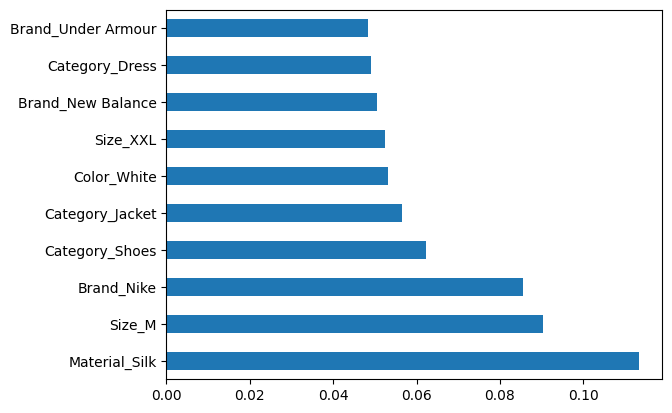

In [28]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


###Ploting/ Visualizing Decision Tree

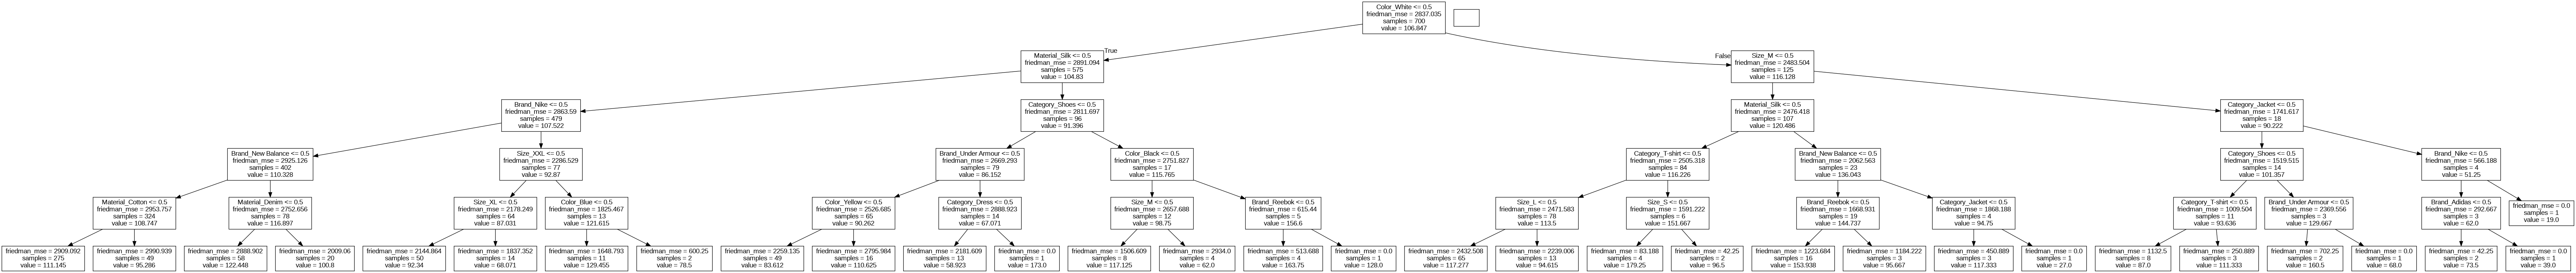

In [30]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

###Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.12186080629313967

##### Model Validation and Accuracy Calculations ##########
   Brand_Adidas  Brand_New Balance  Brand_Nike  Brand_Puma  Brand_Reebok  \
0           0.0                0.0         0.0         0.0           0.0   
1           0.0                1.0         0.0         0.0           0.0   
2           0.0                0.0         0.0         0.0           1.0   
3           0.0                0.0         1.0         0.0           0.0   
4           0.0                1.0         0.0         0.0           0.0   

   Brand_Under Armour  Category_Dress  Category_Jacket  Category_Jeans  \
0                 1.0             1.0              0.0             0.0   
1                 0.0             1.0              0.0             0.0   
2                 0.0             0.0              1.0             0.0   
3                 0.0             0.0              0.0             0.0   
4  

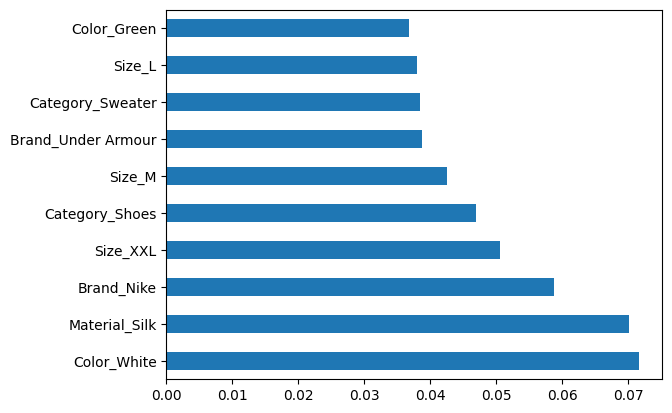

In [31]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

###Ploting one of the Decision Tree in Random Forest Regressor

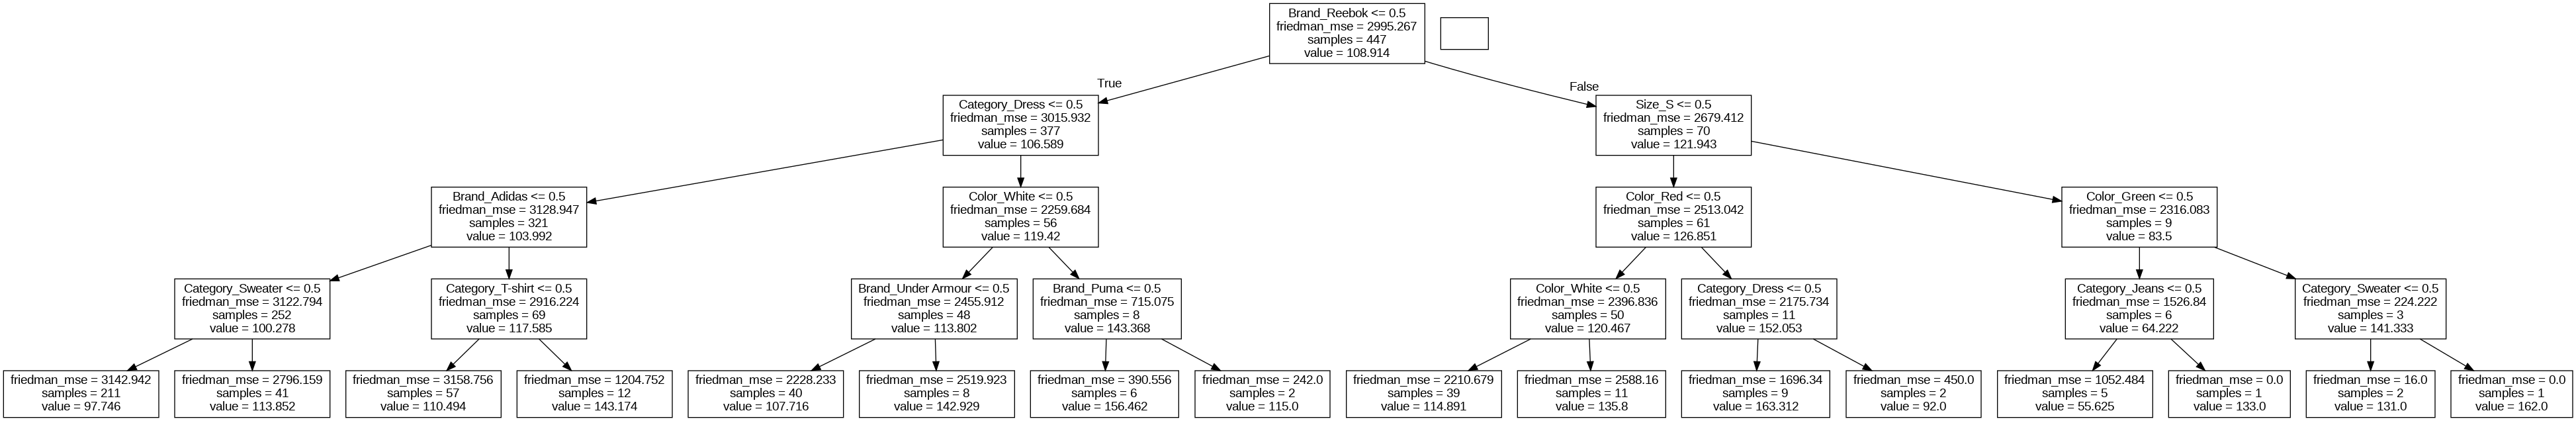

In [32]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in
